## FIFA 21
### FIFA21 statistics for each football player

#### Context
FIFA has been a game that is played by many people across the globe and has come up with many many editions. It was relased in October this year i.e. FIFA 2021. This data set contains the data of the players in game.

#### Content
This dataset contains data of players their rating, their age, their nationality, the position that they play,their potential for growth and other attributes in game

#### Acknowledgements
We wouldn't be here without the help of others. I would like to thanks @karangadiya who I got inspiration from, check his repo here !

The dataset is prepared by Bryan Boule

Here is the dataset link : https://www.kaggle.com/bryanb/fifa-player-stats-database

## Content

<ul>
  <li><a href="#part1">1. Loading Data and Checking Values</a></li>
  <li><a href="#part2">2. Description of Some Columns which I used in Dataframe</a>
  <li><a href="#part3">3. Data Wrangling</a>
    <ul>
      <li><a href="#part3-1">3.1 Create a new Dataframe by selecting some columns</a></li>
      <li><a href="#part3-2">3.2 Start ID from 0 in dataframe</a></li>
      <li><a href="#part3-3">3.3 Remove leading and trailing characters in "Name" column of dataframe</a></li>
      <li><a href="#part3-4">3.4 Define a function to show radar chart</a></li>  
      <li><a href="#part3-5">3.5 Define a function to extracting value from Value Column</a></li> 
      <li><a href="#part3-6">3.6 Define functions showing image</a></li>
      <li><a href="#part3-7">3.7 Define functions converting height</a></li>               
      <li><a href="#part3-8">3.8 Define functions converting weight</a></li>
      <li><a href="#part3-9">3.9 Define new dataframe containing the number of players' position</a></li>
    </ul>
  </li>
  <li><a href="#part4">4. Data Visualization</a>
    <ul>
      <li><a href="#part4-1">4.1 Draw a Correlation Matrix</a></li>
      <li><a href="#part4-2">4.2 Draw a Graph showing top 20 players by overall</a></li>
      <li><a href="#part4-3">4.3 Draw a Graph showing top 20 team by averange overall</a></li>
      <li><a href="#part4-4">4.4 Draw a Graph showing number of player by their nationalities in World Map in Fifa21</a></li>
      <li><a href="#part4-5">4.5 Draw a Figure to show the top 20 number of nationality by the count of player  </a></li>
      <li><a href="#part4-6">4.6 Draw a Figure to show the top 5 player by age,value,height and weight </a></li>
      <li><a href="#part4-7">Draw a Figure to show the top overall 3 player by the features of radar chart  </a></li>
      <li><a href="#part4-8">4.8 Draw figures showing the specturum of players' age and the count number of players' position </a></li>
      <li><a href="#part4-9">4.9 Draw WorldCloud showing all players' names </a></li>  
    </ul>
  </li>
</ul>

<a id='part1'></a>
## 1. Loading Data and Checking Values

1 - Import libraries I used for visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from collections import Counter
from operator import itemgetter
from IPython.display import display, HTML
from plotly.subplots import make_subplots
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator 
from PIL import Image, ImageOps
import plotly.express as px
import plotly.io as pio
import datetime
import matplotlib.cm as mplcm
import random
import matplotlib.colors as mcolors
import requests
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import matplotlib.image as mpimg 
%matplotlib inline

sns.set(style="darkgrid")

2 - Define dataframe after loading all values from csv file and assigning them to it

In [2]:
file_location_url = "files/FIFA21_official_data.csv";

fifa21_df = pd.read_csv(file_location_url, error_bad_lines=False,encoding = "utf-8")

3 - Deterime how many rows and columns are defined in dataframe

In [3]:
row_count = fifa21_df.shape[0]
column_count = fifa21_df.shape[1]

print("Row : {} , Column : {}".format(row_count,column_count))

Row : 17108 , Column : 65


4 - Show first 5 values of dataframe

In [4]:
fifa21_df.head()

ID              Name  Age  \
0  176580         L. Suárez   33   
1  192985      K. De Bruyne   29   
2  212198   Bruno Fernandes   25   
3  194765      A. Griezmann   29   
4  224334          M. Acuña   28   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/20_60.png     Uruguay   
1  https://cdn.sofifa.com/players/192/985/20_60.png     Belgium   
2  https://cdn.sofifa.com/players/212/198/20_60.png    Portugal   
3  https://cdn.sofifa.com/players/194/765/20_60.png      France   
4  https://cdn.sofifa.com/players/224/334/20_60.png   Argentina   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       87         87    Atlético Madrid   
1  https://cdn.sofifa.com/flags/be.png       91         91    Manchester City   
2  https://cdn.sofifa.com/flags/pt.png       87         90  Manchester United   
3  https://cdn.sofifa.com/flags/fr.png       87         87       FC Barcelona   
4  https://cdn.sofifa.com/flags/ar.png       83         83         Sevilla FC   

                                       Club Logo  ... SlidingTackle GKDiving  \
0  https://cdn.sofifa.com/teams/240/light_30.png  ...          38.0     27.0   
1   https://cdn.sofifa.com/teams/10/light_30.png  ...          53.0     15.0   
2   https://cdn.sofifa.com/teams/11/light_30.png  ...          55.0     12.0   
3  https://cdn.sofifa.com/teams/241/light_30.png  ...          49.0     14.0   
4  https://cdn.sofifa.com/teams/481/light_30.png  ...          79.0      8.0   

   GKHandling GKKicking  GKPositioning  GKReflexes  Best Position  \
0        25.0      31.0           33.0        37.0             ST   
1        13.0       5.0           10.0        13.0            CAM   
2        14.0      15.0            8.0        14.0            CAM   
3         8.0      14.0           13.0        14.0             ST   
4        14.0      13.0           13.0        14.0             LB   

  Best Overall Rating Release Clause DefensiveAwareness  
0                87.0         €64.6M               57.0  
1                91.0          €161M               68.0  
2                88.0        €124.4M               72.0  
3                87.0        €103.5M               59.0  
4                83.0         €46.2M               79.0  

[5 rows x 65 columns]

5 - Show last 5 values of dataframe

In [5]:
fifa21_df.tail()

ID           Name  Age  \
17103  247866   19 C. Miszta   16   
17104  251433        B. Voll   19   
17105  252420      T. Parker   18   
17106  248182     H. Sveijer   18   
17107  245862    19 J. Milli   18   

                                                  Photo       Nationality  \
17103  https://cdn.sofifa.com/players/247/866/19_60.png            Poland   
17104  https://cdn.sofifa.com/players/251/433/20_60.png           Germany   
17105  https://cdn.sofifa.com/players/252/420/20_60.png  Northern Ireland   
17106  https://cdn.sofifa.com/players/248/182/20_60.png            Sweden   
17107  https://cdn.sofifa.com/players/245/862/19_60.png             Italy   

                                          Flag  Overall  Potential  \
17103      https://cdn.sofifa.com/flags/pl.png       50         70   
17104      https://cdn.sofifa.com/flags/de.png       51         63   
17105  https://cdn.sofifa.com/flags/gb-nir.png       51         70   
17106      https://cdn.sofifa.com/flags/se.png       49         63   
17107      https://cdn.sofifa.com/flags/it.png       47         65   

                   Club                                         Club Logo  \
17103    Legia Warszawa    https://cdn.sofifa.com/teams/1871/light_30.png   
17104  FC Hansa Rostock      https://cdn.sofifa.com/teams/27/light_30.png   
17105        Luton Town    https://cdn.sofifa.com/teams/1923/light_30.png   
17106         IK Sirius  https://cdn.sofifa.com/teams/113458/light_30.png   
17107             Lecce     https://cdn.sofifa.com/teams/347/light_30.png   

       ... SlidingTackle GKDiving  GKHandling GKKicking  GKPositioning  \
17103  ...          13.0     48.0        51.0      56.0           40.0   
17104  ...          10.0     52.0        55.0      52.0           42.0   
17105  ...          11.0     50.0        49.0      50.0           53.0   
17106  ...          10.0     50.0        51.0      49.0           50.0   
17107  ...          11.0     52.0        52.0      52.0           40.0   

       GKReflexes  Best Position Best Overall Rating Release Clause  \
17103        56.0             GK                49.0          €120K   
17104        57.0             GK                51.0           €83K   
17105        55.0             GK                51.0          €149K   
17106        51.0             GK                49.0           €94K   
17107        44.0             GK                46.0          €109K   

      DefensiveAwareness  
17103                NaN  
17104                5.0  
17105                8.0  
17106                8.0  
17107                NaN  

[5 rows x 65 columns]

6 - Show each column information of dataframe

In [6]:
fifa21_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Photo                     17108 non-null  object 
 4   Nationality               17108 non-null  object 
 5   Flag                      17108 non-null  object 
 6   Overall                   17108 non-null  int64  
 7   Potential                 17108 non-null  int64  
 8   Club                      16783 non-null  object 
 9   Club Logo                 17108 non-null  object 
 10  Value                     17108 non-null  object 
 11  Wage                      17108 non-null  object 
 12  Special                   17108 non-null  int64  
 13  Preferred Foot            17108 non-null  object 
 14  Intern

7 - Show how many variables there are in dataframe

In [7]:
fifa21_df.count()

ID                     17108
Name                   17108
Age                    17108
Photo                  17108
Nationality            17108
                       ...  
GKReflexes             17108
Best Position          17108
Best Overall Rating    17108
Release Clause         15479
DefensiveAwareness     16166
Length: 65, dtype: int64

8 - Show descriptive statistics of dataframe

In [8]:
fifa21_df.describe()

ID           Age       Overall     Potential       Special  \
count   17108.000000  17108.000000  17108.000000  17108.000000  17108.000000   
mean   221421.276187     25.053718     66.780161     72.553542   1625.722995   
std     36028.786065      4.915963      7.019069      5.738347    263.503922   
min         2.000000     16.000000     38.000000     46.000000    731.000000   
25%    205451.750000     21.000000     62.000000     69.000000   1484.000000   
50%    230441.000000     24.000000     67.000000     72.000000   1653.000000   
75%    245402.500000     28.000000     72.000000     76.000000   1810.000000   
max    259105.000000     53.000000     93.000000     95.000000   2316.000000   

       International Reputation     Weak Foot   Skill Moves  Jersey Number  \
count              17108.000000  17108.000000  17108.000000   17088.000000   
mean                   1.147533      2.981938      2.446107      20.756145   
std                    0.455773      0.674699      0.780278      17.194590   
min                    1.000000      1.000000      1.000000       1.000000   
25%                    1.000000      3.000000      2.000000       9.000000   
50%                    1.000000      3.000000      2.000000      18.000000   
75%                    1.000000      3.000000      3.000000      27.000000   
max                    5.000000      5.000000      5.000000      99.000000   

           Crossing  ...     Marking  StandingTackle  SlidingTackle  \
count  17108.000000  ...  942.000000    17108.000000   17069.000000   
mean      51.360065  ...   46.403397       48.101473      45.933271   
std       17.954050  ...   21.803653       21.532834      21.213315   
min        6.000000  ...    4.000000        5.000000       6.000000   
25%       40.000000  ...   25.250000       28.000000      25.000000   
50%       55.000000  ...   48.000000       55.000000      52.000000   
75%       65.000000  ...   66.000000       66.000000      64.000000   
max       94.000000  ...   94.000000       93.000000      95.000000   

           GKDiving    GKHandling     GKKicking  GKPositioning    GKReflexes  \
count  17108.000000  17108.000000  17108.000000   17108.000000  17108.000000   
mean      15.660744     15.529928     15.469839      15.550853     15.771510   
std       16.910205     16.212333     15.977547      16.448905     17.209624   
min        1.000000      1.000000      1.000000       1.000000      1.000000   
25%        8.000000      8.000000      8.000000       8.000000      8.000000   
50%       11.000000     11.000000     11.000000      11.000000     11.000000   
75%       14.000000     14.000000     14.000000      14.000000     14.000000   
max       90.000000     92.000000     93.000000      93.000000     90.000000   

       Best Overall Rating  DefensiveAwareness  
count         17108.000000        16166.000000  
mean             67.753799           47.014475  
std               6.773192           20.152543  
min              42.000000            3.000000  
25%              63.000000           29.000000  
50%              68.000000           52.000000  
75%              72.000000           64.000000  
max              93.000000           94.000000  

[8 rows x 45 columns]

9 - Determine if null values of each column are in a dataframe

In [9]:
fifa21_df.isnull().sum()

ID                        0
Name                      0
Age                       0
Photo                     0
Nationality               0
                       ... 
GKReflexes                0
Best Position             0
Best Overall Rating       0
Release Clause         1629
DefensiveAwareness      942
Length: 65, dtype: int64

<a id='part2'></a>
## 2. Description of Some Columns which I used in Dataframe

In [10]:
values = [
  ['ID', 
   'Name', 
   'Age',
   'Photo',
   'Nationality',
   'Flag',
   'Overall',
   'Club',
   'Club Logo',
   'Value',
   'Height',
   'Weight',
   'Dribbling',
   'Crossing',
   'Jersey Number',
   'LongPassing',
   'BallControl',
   'Acceleration',
   'SprintSpeed',
   'Agility',
   'Strength',
   'Aggression',
   'Stamina',
   'Positioning',
   'Best Position',
   'Best Overall Rating',
   'Finishing',
   'Position'
  ],  #1st col
  ["An unique value refering to stored data in dafaframe", 
   "A name of Player",
   "An age of Player",  
   "A photo of Player",
   "A nationality of Player",
   "A national Flag of Player",
   "An overall Score of Player",
   "A club name which player plays for",
   "A logo of club which player plays for",
   "A value of Player",
   "A height of Player",
   "A weight of Player",
   "A dribbling score of Player",
   "A crossing score of Player",
   "A jersey number of Player",
   "A longPassing score of Player",
   "A ballControl score of Player",
   "A acceleration score of Player",
   "A sprint speed score of Player",
   "An agility score of Player",
   "A strength score of Player",
   "An aggression score of Player",
   "A stamina score of Player",
   "A positioning score of Player",
   "A best Position of Player",
   "A best overall rating of Player",
   "A finishing score of Player",
   "A Position of player"
  ] #2nd col
] 

layout = go.Layout(title="Description of Some Columns which I used in Dataframe", 
                   height=1100, 
                   legend=dict(x=1.1, y=1.3)
                  )

fig = go.Figure(data=[go.Table(
  columnwidth = [200,800],
  header = dict(
    values = [['<b>COLUMN NAME</b>'],
              ['<b>DESCRIPTION</b>']
             ],
    line_color='darkslategray',
    fill_color='dodgerblue',
    align=['left','center'],
    font=dict(color='white', size=12),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['aqua', 'white']),
    align=['left', 'left'],
    font_size=12,
    height=30)
    )
], layout = layout)
pio.write_image(fig, "images/image1.png")
fig.show()

<a id='part3'></a>
## 3. Data Wrangling

<a id='part3-1'></a>
### 3.1 Create a new Dataframe by selecting some columns 

In [11]:
column_names = ['ID', 
   'Name', 
   'Age',
   'Photo',
   'Nationality',
   'Flag',
   'Overall',
   'Club',
   'Club Logo',
   'Value',
   'Height',
   'Weight',
   'Dribbling',
   'Crossing',
   'Jersey Number',
   'LongPassing',
   'BallControl',
   'Acceleration',
   'SprintSpeed',
   'Agility',
   'Strength',
   'Aggression',
   'Stamina',
   'Positioning',
   'Best Position',
   'Best Overall Rating',
   'Finishing',
   'Position'             
]

fifa21_df = fifa21_df[column_names]
fifa21_df.head()

ID              Name  Age  \
0  176580         L. Suárez   33   
1  192985      K. De Bruyne   29   
2  212198   Bruno Fernandes   25   
3  194765      A. Griezmann   29   
4  224334          M. Acuña   28   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/20_60.png     Uruguay   
1  https://cdn.sofifa.com/players/192/985/20_60.png     Belgium   
2  https://cdn.sofifa.com/players/212/198/20_60.png    Portugal   
3  https://cdn.sofifa.com/players/194/765/20_60.png      France   
4  https://cdn.sofifa.com/players/224/334/20_60.png   Argentina   

                                  Flag  Overall               Club  \
0  https://cdn.sofifa.com/flags/uy.png       87    Atlético Madrid   
1  https://cdn.sofifa.com/flags/be.png       91    Manchester City   
2  https://cdn.sofifa.com/flags/pt.png       87  Manchester United   
3  https://cdn.sofifa.com/flags/fr.png       87       FC Barcelona   
4  https://cdn.sofifa.com/flags/ar.png       83         Sevilla FC   

                                       Club Logo   Value  ... SprintSpeed  \
0  https://cdn.sofifa.com/teams/240/light_30.png  €31.5M  ...        68.0   
1   https://cdn.sofifa.com/teams/10/light_30.png    €87M  ...        76.0   
2   https://cdn.sofifa.com/teams/11/light_30.png    €63M  ...        76.0   
3  https://cdn.sofifa.com/teams/241/light_30.png  €50.5M  ...        79.0   
4  https://cdn.sofifa.com/teams/481/light_30.png    €22M  ...        75.0   

  Agility  Strength  Aggression  Stamina  Positioning  Best Position  \
0    76.0      85.0        87.0     78.0         91.0             ST   
1    78.0      74.0        76.0     89.0         88.0            CAM   
2    79.0      67.0        70.0     94.0         83.0            CAM   
3    91.0      63.0        73.0     86.0         89.0             ST   
4    82.0      80.0        84.0     90.0         81.0             LB   

   Best Overall Rating  Finishing                     Position  
0                 87.0       92.0   <span class="pos pos24">RS  
1                 91.0       82.0  <span class="pos pos13">RCM  
2                 88.0       77.0  <span class="pos pos18">CAM  
3                 87.0       88.0   <span class="pos pos23">RW  
4                 83.0       66.0    <span class="pos pos7">LB  

[5 rows x 28 columns]

<a id='part3-2'></a>
### 3.2 Start ID from 0 in dataframe

In [12]:
fifa21_df["ID"] = [i for i in range(len(fifa21_df))]

<a id='part3-3'></a>
### 3.3 Remove leading and trailing characters in "Name" column of dataframe

In [13]:
fifa21_df["Name"] = fifa21_df["Name"].str.strip()

<a id='part3-4'></a>
### 3.4 Define a function to show radar chart

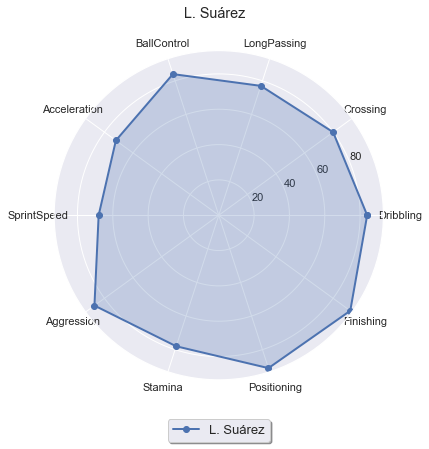

In [14]:
def radar_chart(players=['L. Suárez'], title="L. Suárez", save = ""):

    labels=np.array(['Dribbling',
                     'Crossing', 
                     'LongPassing', 
                     'BallControl',
                     'Acceleration',
                     'SprintSpeed',
                     'Aggression',
                     'Stamina',
                     'Positioning',
                     'Finishing'
                    ]
                   )
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))

    fig=plt.figure(figsize=(6,6))
    plt.suptitle(title, y=1.04)
    for player in players:
        stats=np.array(fifa21_df[fifa21_df["Name"]==player][labels])[0]
        stats=np.concatenate((stats,[stats[0]]))
        ax = fig.add_subplot(111, polar=True)
        ax.plot(angles, stats, 'o-', linewidth=2, label=player)
        ax.fill(angles, stats, alpha=0.25)
        ax.set_thetagrids(angles * 180/np.pi, labels)

    ax.grid(True)
    #plt.legend(loc="upper right",bbox_to_anchor=(1.2,1.0))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
      fancybox=True, shadow=True, ncol=5, fontsize=13)
    plt.tight_layout()
    if save == "Save":
        plt.savefig('images/image8.png', bbox_inches = "tight")
    plt.show()
            
radar_chart()    

<a id='part3-5'></a>
### 3.5 Define a function to extracting value from Value Column

In [15]:
fifa21_df['Value'] = fifa21_df['Value'].str.split('€')
fifa21_df['Value'] = fifa21_df['Value'].apply(lambda x:x[1])


def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)

fifa21_df['Value'] = fifa21_df['Value'].apply(lambda x: extract_value_from(x))

In [16]:
fifa21_df.sort_values(by='Value', ascending = False)

ID               Name  Age  \
122    122          K. Mbappé   21   
70      70          Neymar Jr   28   
1        1       K. De Bruyne   29   
44      44     R. Lewandowski   31   
31      31           M. Salah   28   
...    ...                ...  ...   
5712  5712  20 I. Bandalovski   32   
4796  4796       A. Peñaranda   23   
7807  7807         A. Giannou   30   
9025  9025           C. Lewis   23   
4121  4121       11 A. Karimi   31   

                                                 Photo  Nationality  \
122   https://cdn.sofifa.com/players/231/747/20_60.png       France   
70    https://cdn.sofifa.com/players/190/871/20_60.png       Brazil   
1     https://cdn.sofifa.com/players/192/985/20_60.png      Belgium   
44    https://cdn.sofifa.com/players/188/545/20_60.png       Poland   
31    https://cdn.sofifa.com/players/209/331/20_60.png        Egypt   
...                                                ...          ...   
5712  https://cdn.sofifa.com/players/169/424/20_60.png     Bulgaria   
4796  https://cdn.sofifa.com/players/231/638/20_60.png    Venezuela   
7807  https://cdn.sofifa.com/players/206/435/20_60.png    Australia   
9025  https://cdn.sofifa.com/players/231/063/20_60.png  New Zealand   
4121  https://cdn.sofifa.com/players/166/087/11_60.png         Iran   

                                     Flag  Overall                 Club  \
122   https://cdn.sofifa.com/flags/fr.png       90  Paris Saint-Germain   
70    https://cdn.sofifa.com/flags/br.png       91  Paris Saint-Germain   
1     https://cdn.sofifa.com/flags/be.png       91      Manchester City   
44    https://cdn.sofifa.com/flags/pl.png       91    FC Bayern München   
31    https://cdn.sofifa.com/flags/eg.png       90            Liverpool   
...                                   ...      ...                  ...   
5712  https://cdn.sofifa.com/flags/bg.png       67                  NaN   
4796  https://cdn.sofifa.com/flags/ve.png       69                  NaN   
7807  https://cdn.sofifa.com/flags/au.png       70                  NaN   
9025  https://cdn.sofifa.com/flags/nz.png       60                  NaN   
4121  https://cdn.sofifa.com/flags/ir.png       73        FC Schalke 04   

                                         Club Logo        Value  ...  \
122   https://cdn.sofifa.com/teams/73/light_30.png  105500000.0  ...   
70    https://cdn.sofifa.com/teams/73/light_30.png   90000000.0  ...   
1     https://cdn.sofifa.com/teams/10/light_30.png   87000000.0  ...   
44    https://cdn.sofifa.com/teams/21/light_30.png   80000000.0  ...   
31     https://cdn.sofifa.com/teams/9/light_30.png   78000000.0  ...   
...                                            ...          ...  ...   
5712           https://cdn.sofifa.com/flags/bg.png          0.0  ...   
4796           https://cdn.sofifa.com/flags/ve.png          0.0  ...   
7807           https://cdn.sofifa.com/flags/au.png          0.0  ...   
9025           https://cdn.sofifa.com/flags/nz.png          0.0  ...   
4121  https://cdn.sofifa.com/teams/34/light_30.png          0.0  ...   

     SprintSpeed Agility  Strength  Aggression  Stamina  Positioning  \
122         96.0    92.0      76.0        62.0     86.0         91.0   
70          89.0    96.0      50.0        51.0     81.0         87.0   
1           76.0    78.0      74.0        76.0     89.0         88.0   
44          78.0    77.0      86.0        81.0     76.0         94.0   
31          92.0    91.0      75.0        63.0     85.0         91.0   
...          ...     ...       ...         ...      ...          ...   
5712        74.0    67.0      60.0        77.0     72.0         66.0   
4796        76.0    75.0      64.0        64.0     46.0         68.0   
7807        70.0    62.0      79.0        65.0     71.0         72.0   
9025        67.0    76.0      49.0        49.0     54.0         53.0   
4121        68.0    81.0      71.0        51.0     63.0         75.0   

      Best Position  Best Overall Rating  Finishing  \
122         

<a id='part3-6'></a>
### 3.6 Define functions showing image

In [17]:
def get_flag(name):
    r = requests.get(name,
                  stream=True, headers={'User-agent': 'Mozilla/5.0'})
    country_pic = plt.imread(r.raw)
    return country_pic

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.72)
    im.image.axes = ax
    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)
    ax.add_artist(ab)

<a id='part3-7'></a>
### 3.7 Define functions converting height

In [18]:
def convert_height(Value):
    out = Value
    if "6'8" in out:
        out = 203.2
    elif "6'9" in Value:
        out = 205.74
    return float(out)

<a id='part3-8'></a>
### 3.8 Define functions converting weight

In [19]:
def convert_weight(Value):
    out = Value.replace('lbs', '')
    out = float(out)
    return out * 0.45359237

<a id='part3-9'></a>
### 3.9 Define new dataframe containing the number of players' position

In [20]:
fifa21_df_position = pd.DataFrame({'count' : fifa21_df.groupby(['Position']).size()}).reset_index()
fifa21_df_position = fifa21_df_position.sort_values(['count'], ascending = False)
fifa21_df_position.reset_index(drop=True, inplace=True)

<a id='part3-10'></a>
### 3.10 Remove <span> tag from Position column of new dataframe

In [21]:
for i in range(0,30):
    fifa21_df_position['Position'] = fifa21_df_position['Position'].str.replace('<span class="pos pos'+ str(i) +'">', '')

<a id='part4'></a>
## 4. Data Visualization

<a id='part4-1'></a>
### 4.1 Draw a Correlation Matrix

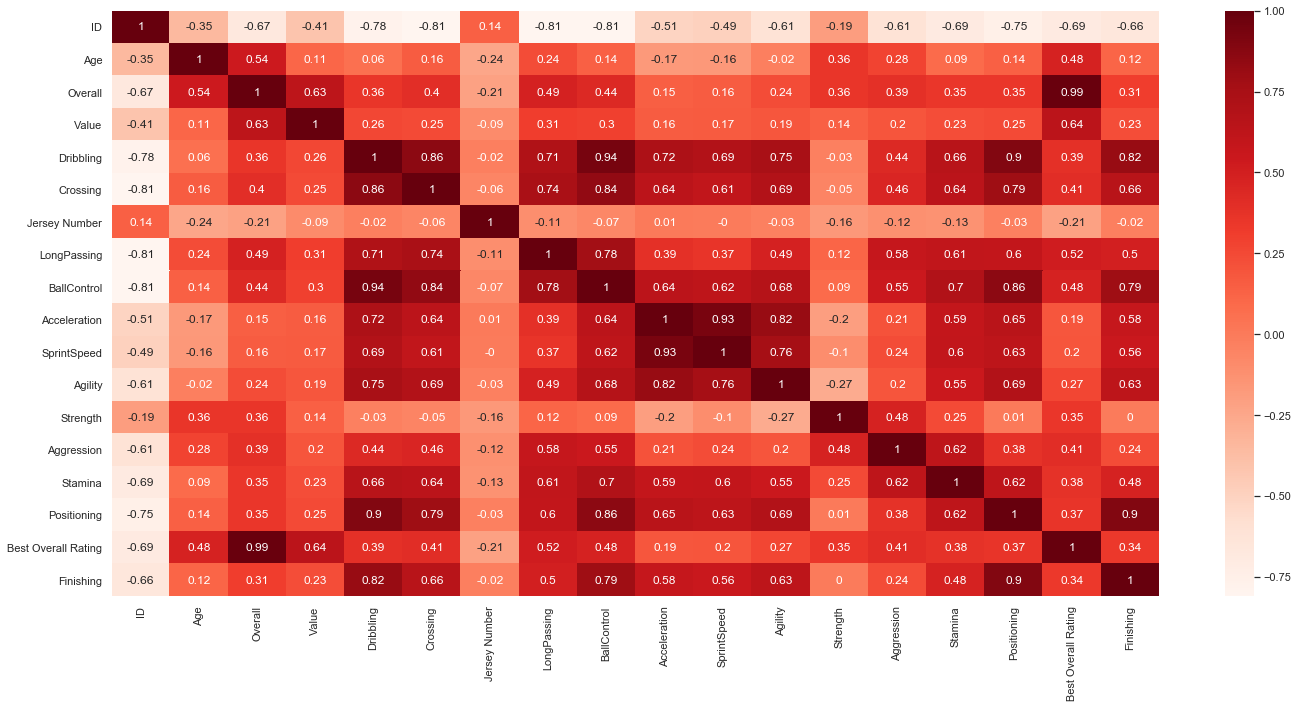

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(round(fifa21_df.corr(),2), annot=True, cmap='Reds')
plt.tight_layout()
plt.savefig('images/image2.png', bbox_inches = "tight")
plt.show()

<a id='part4-2'></a>
### 4.2 Draw a Graph showing top 20 players by overall

In [23]:
fifa21_df_top_20_player = fifa21_df.sort_values(by=['Overall'], ascending=False)
fifa21_df_top_20_player = fifa21_df_top_20_player.head(20)
fifa21_df_top_20_player

ID               Name  Age  \
18        18           L. Messi   33   
22        22  Cristiano Ronaldo   35   
70        70          Neymar Jr   28   
1          1       K. De Bruyne   29   
44        44     R. Lewandowski   31   
14060  14060           J. Oblak   27   
31        31           M. Salah   28   
38        38            S. Mané   28   
122      122          K. Mbappé   21   
204      204        V. van Dijk   28   
14390  14390            Alisson   27   
13611  13611      M. ter Stegen   28   
182      182          S. Agüero   32   
23        23           Casemiro   28   
209      209         K. Benzema   32   
12146  12146           M. Neuer   34   
11        11       Sergio Ramos   34   
15047  15047        T. Courtois   28   
78        78            H. Kane   26   
109      109          P. Dybala   26   

                                                  Photo  Nationality  \
18     https://cdn.sofifa.com/players/158/023/20_60.png    Argentina   
22     https://cdn.sofifa.com/players/020/801/20_60.png     Portugal   
70     https://cdn.sofifa.com/players/190/871/20_60.png       Brazil   
1      https://cdn.sofifa.com/players/192/985/20_60.png      Belgium   
44     https://cdn.sofifa.com/players/188/545/20_60.png       Poland   
14060  https://cdn.sofifa.com/players/200/389/20_60.png     Slovenia   
31     https://cdn.sofifa.com/players/209/331/20_60.png        Egypt   
38     https://cdn.sofifa.com/players/208/722/20_60.png      Senegal   
122    https://cdn.sofifa.com/players/231/747/20_60.png       France   
204    https://cdn.sofifa.com/players/203/376/20_60.png  Netherlands   
14390  https://cdn.sofifa.com/players/212/831/20_60.png       Brazil   
13611  https://cdn.sofifa.com/players/192/448/20_60.png      Germany   
182    https://cdn.sofifa.com/players/153/079/20_60.png    Argentina   
23     https://cdn.sofifa.com/players/200/145/20_60.png       Brazil   
209    https://cdn.sofifa.com/players/165/153/20_60.png       France   
12146  https://cdn.sofifa.com/players/167/495/20_60.png      Germany   
11     https://cdn.sofifa.com/players/155/862/20_60.png        Spain   
15047  https://cdn.sofifa.com/players/192/119/20_60.png      Belgium   
78     https://cdn.sofifa.com/players/202/126/20_60.png      England   
109    https://cdn.sofifa.com/players/211/110/20_60.png    Argentina   

                                          Flag  Overall                 Club  \
18         https://cdn.sofifa.com/flags/ar.png       93         FC Barcelona   
22         https://cdn.sofifa.com/flags/pt.png       92             Juventus   
70         https://cdn.sofifa.com/flags/br.png       91  Paris Saint-Germain   
1          https://cdn.sofifa.com/flags/be.png       91      Manchester City   
44         https://cdn.sofifa.com/flags/pl.png       91    FC Bayern München   
14060      https://cdn.sofifa.com/flags/si.png       91      Atlético Madrid   
31         https://cdn.sofifa.com/flags/eg.png       90            Liverpool   
38         https://cdn.sofifa.com/flags/sn.png       90            Liverpool   
122        https://cdn.sofifa.com/flags/fr.png       90  Paris Saint-Germain   
204        https://cdn.sofifa.com/flags/nl.png       90            Liverpool   
14390      https://cdn.sofifa.com/flags/br.png       90            Liverpool   
13611      https://cdn.sofifa.com/flags/de.png       90         FC Barcelona   
182        https://cdn.sofifa.com/flags/ar.png       89      Manchester City   
23         https://cdn.sofifa.com/flags/br.png       89          Real Madrid   
209        https://cdn.sofifa.com/flags/fr.png       89          Real Madrid   
12146      https://cdn.sofifa.com/flags/de.png       89    FC Bayern München   
11         https://cdn.sofifa.com/flags/es.png       89          Real Madrid   
15047      https://cdn.sofifa.com/flags/be.png       89          Real Madrid   
78     https://cdn.sofifa.com/flags/gb-eng.png       88    Tottenham Hotspur   
109        https://cdn.sofifa.com/flags/ar.png       88 

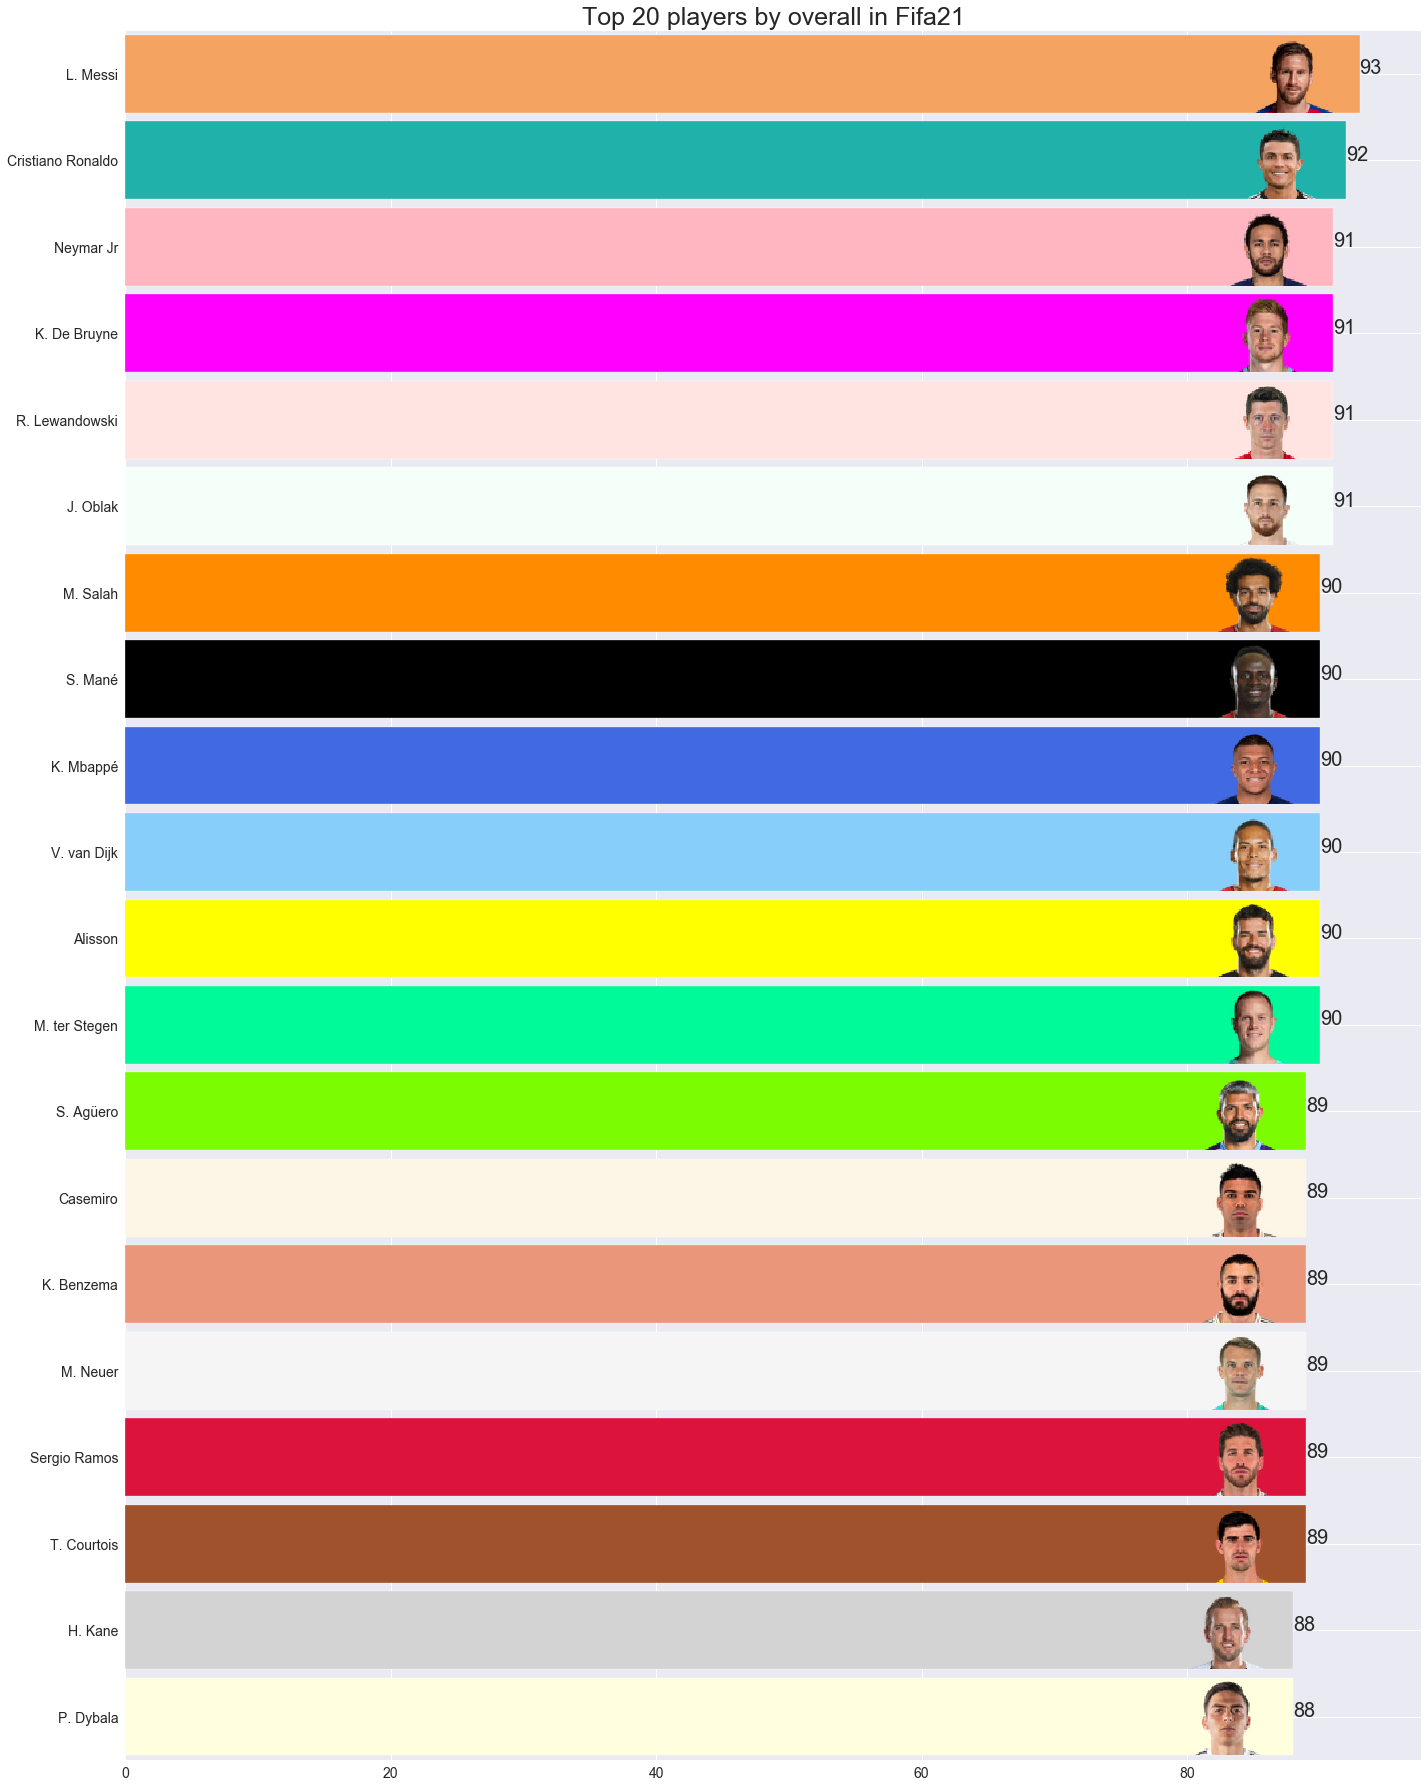

In [24]:
fifa21_df_top_20_player = fifa21_df.sort_values(by=['Overall'], ascending=False)
fifa21_df_top_20_player = fifa21_df_top_20_player.head(20)
fifa21_df_top_20_player = fifa21_df_top_20_player[::-1]

plt.figure(figsize=(20,25))

colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = fifa21_df_top_20_player.size)

plt.style.use('seaborn')

X = [p for p in fifa21_df_top_20_player["Overall"]]
Y = [p for p in fifa21_df_top_20_player["Name"]]

liste_pays = [ (i,y) for i,y in zip(fifa21_df_top_20_player["Photo"],fifa21_df_top_20_player["Overall"])]


height = 0.9
plt.barh(y=Y, width=X, height=height, color=colors, align='center')

for index, value in enumerate(X):
    plt.text(value, index, str(value),fontsize=20)

for i, (label, value) in enumerate(liste_pays):
    r = requests.get(label,
                  stream=True, headers={'User-agent': 'Mozilla/5.0'})
    img = plt.imread(r.raw)
    plt.imshow(img, extent=[value - 8, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)
    
    
plt.xlim(0, max(fifa21_df_top_20_player["Overall"]) * 1.05)
plt.ylim(-0.5, len(fifa21_df_top_20_player["Name"]) - 0.5)
plt.title("Top 20 players by overall in Fifa21", fontsize = 25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('images/image3.png', bbox_inches = "tight")
plt.show()

<a id='part4-3'></a>
### 4.3 Draw a Graph showing top 20 team by averange overall

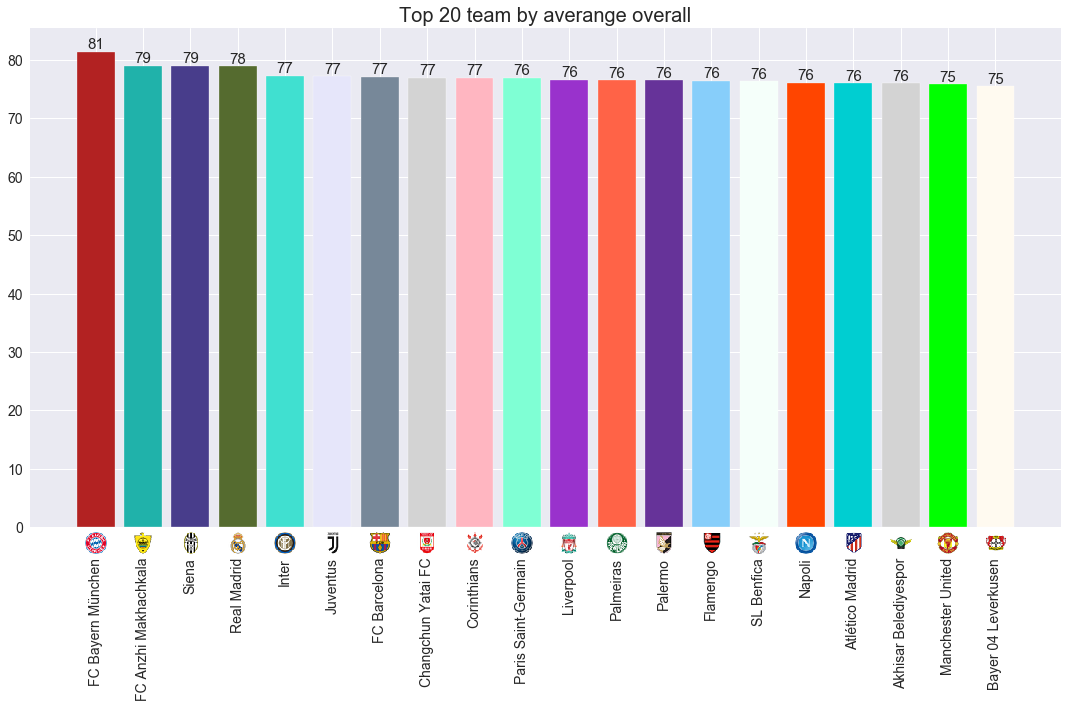

In [25]:
fifa21_df_top_20_team = fifa21_df.groupby(['Club','Club Logo'])['Overall'].mean().reset_index()
fifa21_df_top_20_team = fifa21_df_top_20_team.sort_values(by=['Overall'], ascending=False)
fifa21_df_top_20_team = fifa21_df_top_20_team.drop(8)
fifa21_df_top_20_team.reset_index(drop=True, inplace=True)
fifa21_df_top_20_team = fifa21_df_top_20_team.head(20)

colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = fifa21_df_top_20_team.size)

plt.figure(figsize=(15,10))

club_logo = np.asarray(fifa21_df_top_20_team["Club Logo"])    

X = [p for p in fifa21_df_top_20_player["Overall"]]

bar_plot = plt.bar(range(len(club_logo)), fifa21_df_top_20_team["Overall"], color = colors, align='center', width=0.8 )

for rect in bar_plot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom',fontsize=15)

plt.gca().set_xticks(range(len(club_logo)))
plt.gca().set_xticklabels(fifa21_df_top_20_team["Club"])
plt.gca().set_title('Top 20 team by averange overall' , fontsize=20)
plt.tick_params(axis='x', which='major', pad=30)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)

for i, c in enumerate(club_logo):
    offset_image(i, c, plt.gca())

plt.tight_layout()
plt.savefig('images/image4.png', bbox_inches = "tight")
plt.show()  

<a id='part4-4'></a>
### 4.4 Draw a Graph showing number of player by their nationalities in World Map in Fifa21

In [26]:
fifa21_df_nationality = pd.DataFrame({'count' : fifa21_df.groupby(['Nationality']).size()}).reset_index()
fifa21_df_nationality = fifa21_df_nationality.sort_values(['count'], ascending = False)


fifa21_df_nationality['Nationality'] = fifa21_df_nationality['Nationality'].replace('England', 'United Kingdom')

fig = px.choropleth(fifa21_df_nationality, 
                    locations="Nationality", 
                    locationmode='country names', 
                    color="count", 
                    hover_name="Nationality", 
                    color_continuous_scale="YlOrRd",                    
                    title='The number of players with Nationality in World Map in FIFA 2021')

fig.update_layout(margin=dict(t=80,l=0,r=0,b=0))
pio.write_image(fig, "images/image5.png") 
fig.show()

<a id='part4-5'></a>
### 4.5 Draw a Figure to show the top 20 number of nationality by the count of player

In [27]:
fifa21_df_nationality = pd.DataFrame({'count' : fifa21_df.groupby(['Nationality']).size()}).reset_index()
fifa21_df_nationality = fifa21_df_nationality.sort_values(['count'], ascending = False)


fifa21_df_nationality['Nationality'] = fifa21_df_nationality['Nationality'].replace('England', 'United Kingdom')

df2 = fifa21_df_nationality[:20].copy()

new_row = pd.DataFrame(data = {
    'Nationality' : ['others'],
    'count' : [fifa21_df_nationality['count'][20:].sum()]
})

#combining top 20 with others
fifa21_df_nationality_top_20_others = pd.concat([df2, new_row])
fifa21_df_nationality_top_20_others = fifa21_df_nationality_top_20_others.reset_index()
fifa21_df_nationality_top_20_others

index          Nationality  count
0      48       United Kingdom   1730
1      59              Germany   1166
2     144                Spain   1106
3      55               France    997
4      20               Brazil    811
5       6            Argentina    772
6      78                Italy    559
7     109          Netherlands    460
8     102               Mexico    369
9     126             Portugal    368
10    161        United States    351
11    162              Uruguay    321
12    125               Poland    306
13    136             Scotland    296
14     81                Japan    291
15     33             Colombia    283
16     14              Belgium    282
17    129  Republic of Ireland    272
18    117               Norway    269
19    148               Sweden    251
20      0               others   5848

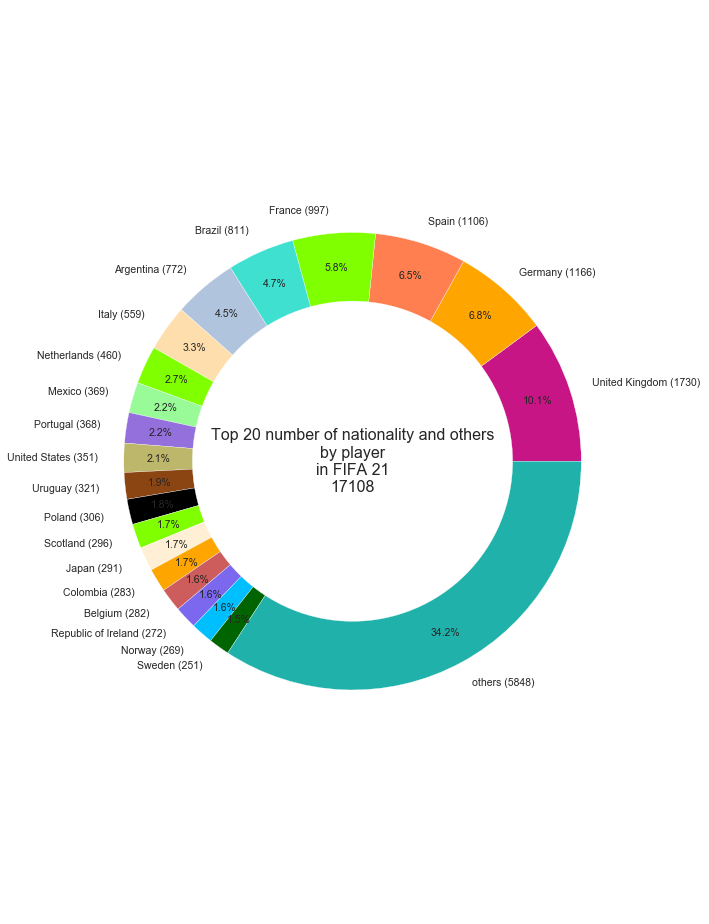

In [28]:
plt.figure(figsize=(10,13))
ax = subplot_kw=dict(aspect="equal")
my_circle = plt.Circle((0, 0), 0.7, color='white')
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = fifa21_df_nationality_top_20_others.size)

labels = [fifa21_df_nationality_top_20_others['Nationality'][i] +" (" + str(fifa21_df_nationality_top_20_others['count'][i]) +") "   for i in range(fifa21_df_nationality_top_20_others.shape[0])]

d =  plt.pie(fifa21_df_nationality_top_20_others['count'], labels= labels,
            autopct='%1.1f%%',
            pctdistance=0.85, 
            labeldistance=1.1,
            colors = colors,
            textprops = {'fontsize':10.5})

plt.axis('equal')
plt.gca().add_artist(my_circle)



plt.text(0, 
         0, 
         "Top 20 number of nationality and others"+ '\nby player' + "\nin FIFA 21\n" +str(fifa21_df_nationality_top_20_others['count'].sum()),
         horizontalalignment='center',
         verticalalignment='center',
         size=16,
        )

plt.tight_layout()
plt.savefig('images/image6.png', bbox_inches = "tight")
plt.show() 

<a id='part4-6'></a>
### 4.6 Draw a Figure to show the top 5 player by age,value,height and weight

In [29]:
fifa21_df_top_5_player_age = fifa21_df.sort_values(by=['Age'], ascending=False)
fifa21_df_top_5_player_age = fifa21_df_top_5_player_age.head()
fifa21_df_top_5_player_age = fifa21_df_top_5_player_age[::-1]

fifa21_df_top_5_player_value = fifa21_df.sort_values(by=['Value'], ascending=False)
fifa21_df_top_5_player_value = fifa21_df_top_5_player_value.head()
fifa21_df_top_5_player_value = fifa21_df_top_5_player_value[::-1]

fifa21_df_top_5_player_height = fifa21_df.sort_values(by=['Height'], ascending=False)
fifa21_df_top_5_player_height = fifa21_df_top_5_player_height.head()
fifa21_df_top_5_player_height = fifa21_df_top_5_player_height[::-1]

fifa21_df_top_5_player_weight = fifa21_df.sort_values(by=['Weight'], ascending=False)
fifa21_df_top_5_player_weight = fifa21_df_top_5_player_weight.head()
fifa21_df_top_5_player_weight = fifa21_df_top_5_player_weight[::-1]

In [30]:
#Miura -> https://cdn.sofifa.com/players/254/704/21_60.png
#Royce -> https://cdn.sofifa.com/players/notfound_0_60.png
#Nakamura -> https://cdn.sofifa.com/players/180/754/21_60.png

fifa21_df_top_5_player_age.loc[fifa21_df_top_5_player_age['Name'] == "K. Miura", 'Photo'] = "https://cdn.sofifa.com/players/254/704/21_60.png"
fifa21_df_top_5_player_age.loc[fifa21_df_top_5_player_age['Name'] == "20\xa0S. Royce", 'Photo'] = "https://cdn.sofifa.com/players/notfound_0_60.png"
fifa21_df_top_5_player_age.loc[fifa21_df_top_5_player_age['Name'] == "S. Nakamura", 'Photo'] = "https://cdn.sofifa.com/players/180/754/21_60.png"

In [31]:
# Samnik -> https://cdn.sofifa.com/players/notfound_0_60.png
# Maierhofer -> https://cdn.sofifa.com/players/179/549/21_60.png
#
fifa21_df_top_5_player_height.loc[fifa21_df_top_5_player_height['Name'] == "20\xa0J. Samnik", 'Photo'] = "https://cdn.sofifa.com/players/notfound_0_60.png"
fifa21_df_top_5_player_height.loc[fifa21_df_top_5_player_height['Name'] == "S. Maierhofer", 'Photo'] = "https://cdn.sofifa.com/players/notfound_0_60.png"

In [32]:
fifa21_df_top_5_player_height["Height"] = fifa21_df_top_5_player_height["Height"].apply(lambda x: convert_height(x))

In [33]:
fifa21_df_top_5_player_weight["Weight"] = fifa21_df_top_5_player_weight["Weight"].apply(lambda x: convert_weight(x))

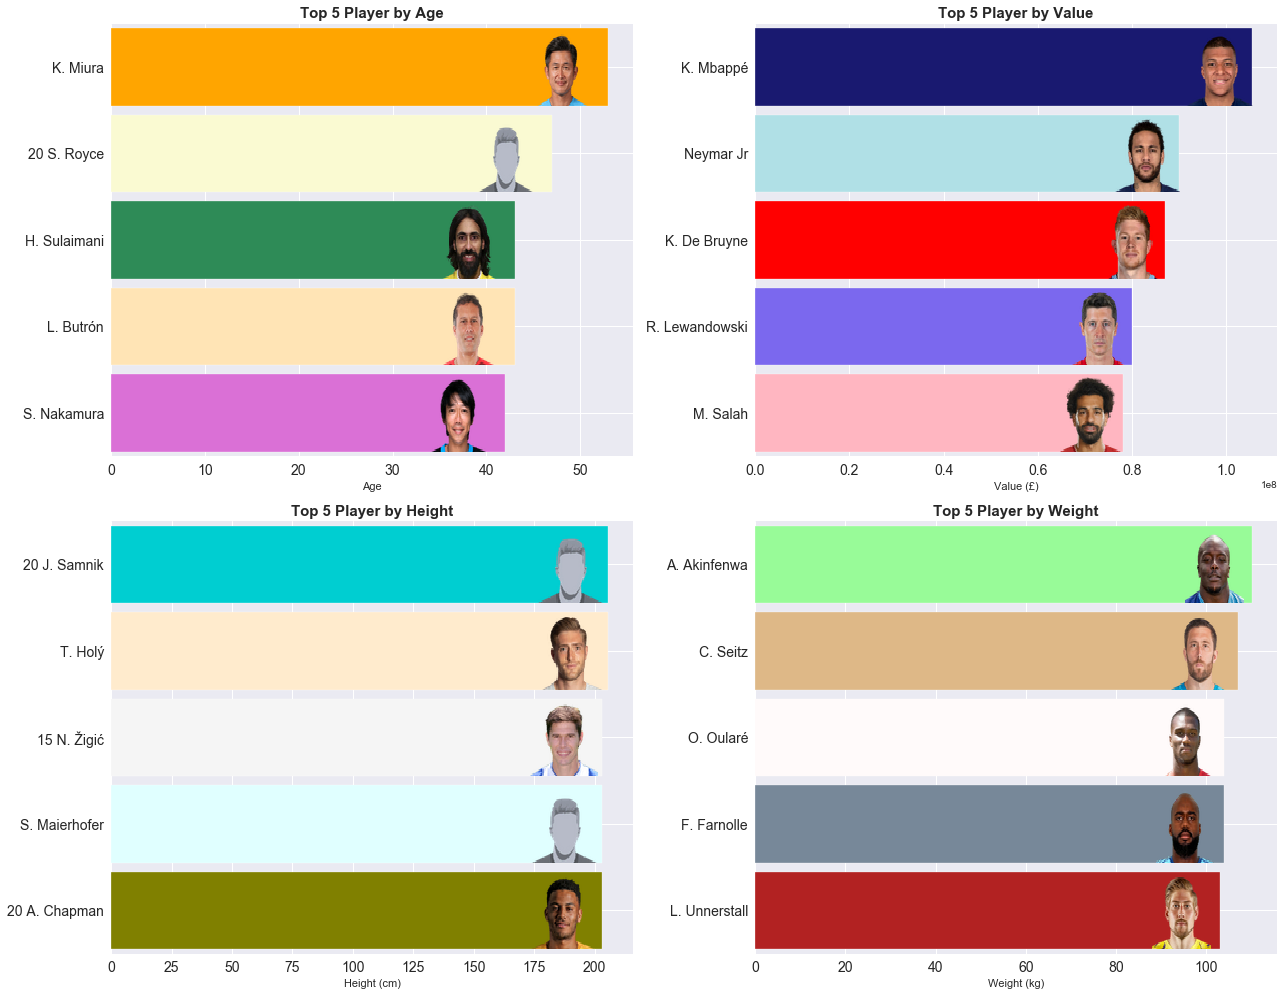

In [34]:
#f,a = plt.subplots(2,2,figsize=(18,14))
#f.subplots_adjust(wspace = 0.5, hspace=0.4)

plt.figure(figsize=(18,14))

colors_1 = random.choices(list(mcolors.CSS4_COLORS.values()),k = fifa21_df_top_5_player_age.size)
colors_2 = random.choices(list(mcolors.CSS4_COLORS.values()),k = fifa21_df_top_5_player_value.size)
colors_3 = random.choices(list(mcolors.CSS4_COLORS.values()),k = fifa21_df_top_5_player_height.size)
colors_4 = random.choices(list(mcolors.CSS4_COLORS.values()),k = fifa21_df_top_5_player_weight.size)

plt.style.use('seaborn')

plt.subplot(2,2,1)

#### AGE
X = [p for p in fifa21_df_top_5_player_age["Age"]]
Y = [p for p in fifa21_df_top_5_player_age["Name"]]

liste_pays_1 = [ (i,y) for i,y in zip(fifa21_df_top_5_player_age["Photo"],fifa21_df_top_5_player_age["Age"])]

height = 0.9
plt.barh(y=Y, width=X, height=height, color=colors_1, align='center')
plt.title('Top 5 Player by Age', fontsize=15, fontweight='bold')

for i, (label, value) in enumerate(liste_pays_1):
    r = requests.get(label,
                  stream=True, headers={'User-agent': 'Mozilla/5.0'})
    img = mpimg.imread(r.raw ,format="png")
    plt.imshow(img, extent=[value - 8, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)

plt.xlim(0, max(fifa21_df_top_5_player_age["Age"]) * 1.05)
plt.ylim(-0.5, len(fifa21_df_top_5_player_age["Name"]) - 0.5)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Age')
    
plt.subplot(2,2,2)    
    
#### VALUE
X = [p for p in fifa21_df_top_5_player_value["Value"]]
Y = [p for p in fifa21_df_top_5_player_value["Name"]]

liste_pays_2 = [ (i,y) for i,y in zip(fifa21_df_top_5_player_value["Photo"],fifa21_df_top_5_player_value["Value"])]


height = 0.9
plt.barh(y=Y, width=X, height=height, color=colors_2, align='center')
plt.title('Top 5 Player by Value', fontsize=15, fontweight='bold')

for i, (label, value) in enumerate(liste_pays_2):
    r = requests.get(label,
                  stream=True, headers={'User-agent': 'Mozilla/5.0'})
    img = mpimg.imread(r.raw)
    plt.imshow(img, extent=[value - 14000000, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)
    
plt.xlim(0, max(fifa21_df_top_5_player_value["Value"]) * 1.05)
plt.ylim(-0.5, len(fifa21_df_top_5_player_value["Name"]) - 0.5)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Value (£)')
    
plt.subplot(2,2,3)    
    
#### HEIGHT
X = [p for p in fifa21_df_top_5_player_height["Height"]]
Y = [p for p in fifa21_df_top_5_player_height["Name"]]

liste_pays_3 = [ (i,y) for i,y in zip(fifa21_df_top_5_player_height["Photo"],fifa21_df_top_5_player_height["Height"])]


height = 0.9
plt.barh(y=Y, width=X, height=height, color=colors_3, align='center')
plt.title('Top 5 Player by Height', fontsize=15, fontweight='bold')

for i, (label, value) in enumerate(liste_pays_3):
    r = requests.get(label,
                  stream=True, headers={'User-agent': 'Mozilla/5.0'})
    img = mpimg.imread(r.raw)
    plt.imshow(img, extent=[value - 30, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)   

plt.xlim(0, max(fifa21_df_top_5_player_height["Height"]) * 1.05)
plt.ylim(-0.5, len(fifa21_df_top_5_player_height["Name"]) - 0.5)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Height (cm)')
    
    
plt.subplot(2,2,4)     
    
#### HEIGHT
X = [p for p in fifa21_df_top_5_player_weight["Weight"]]
Y = [p for p in fifa21_df_top_5_player_weight["Name"]]

liste_pays_4 = [ (i,y) for i,y in zip(fifa21_df_top_5_player_weight["Photo"],fifa21_df_top_5_player_weight["Weight"])]


height = 0.9
plt.barh(y=Y, width=X, height=height, color=colors_4, align='center')
plt.title('Top 5 Player by Weight', fontsize=15, fontweight='bold')

for i, (label, value) in enumerate(liste_pays_4):
    r = requests.get(label,
                  stream=True, headers={'User-agent': 'Mozilla/5.0'})
    img = mpimg.imread(r.raw)
    plt.imshow(img, extent=[value - 15, value - 2, i - height / 2, i + height / 2], aspect='auto', zorder=2)  

plt.xlim(0, max(fifa21_df_top_5_player_weight["Weight"]) * 1.05)
plt.ylim(-0.5, len(fifa21_df_top_5_player_weight["Name"]) - 0.5)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Weight (kg)')
    
plt.tight_layout()
plt.savefig('images/image7.png', bbox_inches = "tight")
plt.show() 

<a id='part4-7'></a>
### 4.7 Draw a Figure to show the top overall 3 player by the features of radar chart 

In [35]:
fifa21_df_top_3_player = fifa21_df.sort_values(by=['Overall'], ascending=False)
fifa21_df_top_3_player = fifa21_df_top_3_player.head(3)
fifa21_df_top_3_player

ID               Name  Age  \
18  18           L. Messi   33   
22  22  Cristiano Ronaldo   35   
70  70          Neymar Jr   28   

                                               Photo Nationality  \
18  https://cdn.sofifa.com/players/158/023/20_60.png   Argentina   
22  https://cdn.sofifa.com/players/020/801/20_60.png    Portugal   
70  https://cdn.sofifa.com/players/190/871/20_60.png      Brazil   

                                   Flag  Overall                 Club  \
18  https://cdn.sofifa.com/flags/ar.png       93         FC Barcelona   
22  https://cdn.sofifa.com/flags/pt.png       92             Juventus   
70  https://cdn.sofifa.com/flags/br.png       91  Paris Saint-Germain   

                                        Club Logo       Value  ...  \
18  https://cdn.sofifa.com/teams/241/light_30.png  67500000.0  ...   
22   https://cdn.sofifa.com/teams/45/light_30.png  46000000.0  ...   
70   https://cdn.sofifa.com/teams/73/light_30.png  90000000.0  ...   

   SprintSpeed Agility  Strength  Aggression  Stamina  Positioning  \
18        80.0    91.0      69.0        44.0     72.0         93.0   
22        91.0    87.0      78.0        63.0     84.0         95.0   
70        89.0    96.0      50.0        51.0     81.0         87.0   

    Best Position  Best Overall Rating  Finishing                    Position  
18             RW                 93.0       95.0  <span class="pos pos25">ST  
22             ST                 92.0       95.0  <span class="pos pos26">LS  
70             LW                 91.0       87.0  <span class="pos pos27">LW  

[3 rows x 28 columns]

C:\Users\Noyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

C:\Users\Noyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



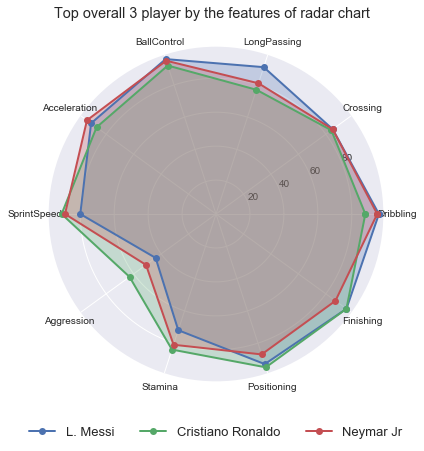

In [36]:
radar_chart(players=fifa21_df_top_3_player["Name"],
           title="Top overall 3 player by the features of radar chart", save = "Save")

<a id='part4-8'></a>
### 4.8 Draw figures showing the specturum of players' age and the count number of players' position

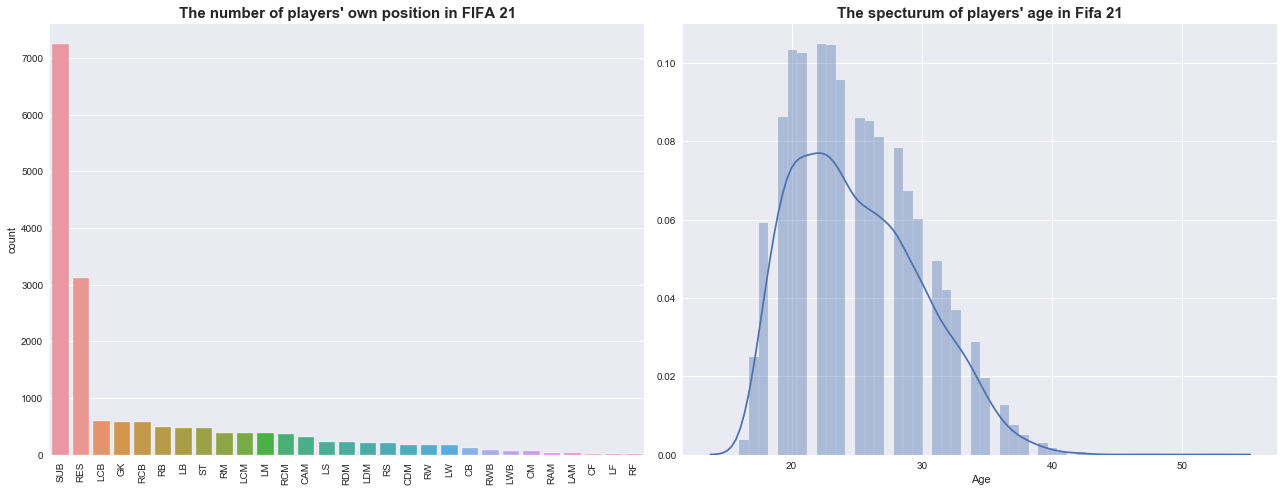

In [37]:
f,a = plt.subplots(1,2,figsize=(18,7))
f.subplots_adjust(wspace = 0.5, hspace=0.4)


sns.barplot(data=fifa21_df_position, x = "Position" , y = 'count',
            ax=a[0])
a[0].set_title("The number of players' own position in FIFA 21", fontsize=15, fontweight='bold')
a[0].set_xlabel('');
a[0].set_xticklabels(a[0].get_xticklabels(),rotation = 90)

sns.distplot(fifa21_df['Age'],
            ax=a[1])
a[1].set_title("The specturum of players' age in Fifa 21", fontsize=15, fontweight='bold')

plt.tight_layout()
plt.savefig('images/image9.png', bbox_inches = "tight")
plt.show();

<a id='part4-9'></a>
### 4.9 Draw WorldCloud showing all players' names

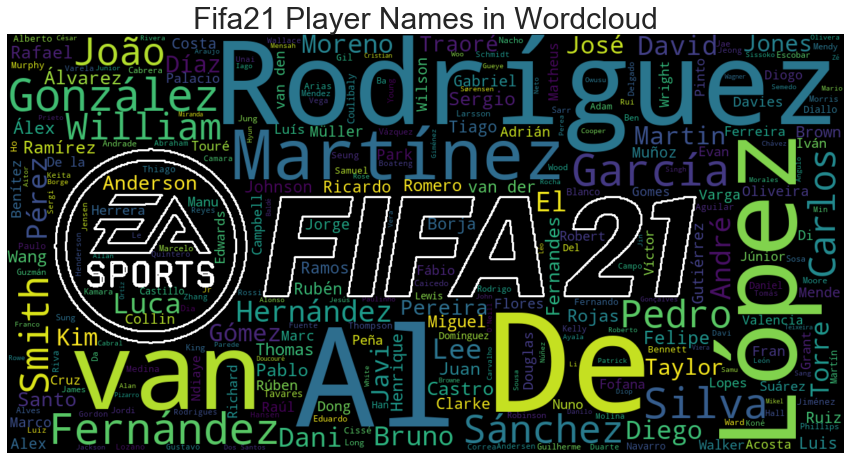

In [38]:
plt.figure(figsize=[15, 15])

image = Image.open("images/fifa21.png")
image_gray = image.convert('L')
image_invert = ImageOps.invert(image_gray)
char_mask = np.array(image_invert)
image_colors = ImageColorGenerator(char_mask)


wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='black', 
                        #width=1000,  
                        #height=1000, 
                        max_words=300,
                        mask=char_mask,
                        contour_width=3, 
                        contour_color='white',
                    ).generate(' '.join(fifa21_df['Name']))


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Fifa21 Player Names in Wordcloud', fontsize=30)
plt.savefig('images/image10.png')
plt.show()